Autores:
* Santiago Castro Benavides 			A01799544
* Rodrigo Lira Del Ángel 			A01799277
* Diego Jesús de Lara de la Cruz		A01748449
* Andrés Felipe García Viña                              A01800027

En el presente Notebook se realizo un modelo capaz de realizar un pronostico medico a partir de un conjunto de sintomas.
para esto se hizo uso de redes bayesianas, y la aplicacion de inferencia a la red bayesiana.

las librerias a usar fueron:
* `bnlearn:` la cual es especializada en el aprendizaje y la inferencia de redes bayesianas. las cuales son tomadas como modelos graficos (Haciendo referencia a la estructura de Grafo) probabilisticos que representan relaciones de dependecia condicional entre variables mediante un grafo dirigido aciclico. en este modelo en especifico se muestra su funcionamiento mediante aprendizaje de parametros, de estructuras y la aplicacion de inferencia. <br>
* `Sklearn:` Sklearn ayudo a la segmentacion de datos para prueba y prediccion. ademas de ser fundamental para la creacion del model<br>

* `Pandas y Numpy:` para el preprocesamiento y manipulacion de los datos <br>
* `seaborn:` libreria usada para la representacion grafica de ciertas relaciones en el modelo  <br>
* `Collections:` para el manejo optimo y simplificado de diccionarios.



# Importación de librerias

para hacer uso de la libreria bnlearn se necesita descargar sus dependencias desde el gestor de paquetes _pip_. por lo que es necesario ejecutar el siguiente comando:

In [2]:
!pip install bnlearn

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1

In [3]:
import numpy as np
import pandas as pd
import bnlearn as bn
import seaborn as sns
from collections import OrderedDict
from sklearn.model_selection import train_test_split

# Preprocesamiento de los Datos

In [4]:
pd.set_option('display.max_columns', None)

importacion del Data Set

In [6]:
df = pd.read_csv('/chronicDiseaseDataset.csv')
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df['Symptom_1'].unique()

array(['itching', ' skin_rash', ' continuous_sneezing', ' shivering',
       ' stomach_pain', ' acidity', ' vomiting', ' indigestion',
       ' muscle_wasting', ' patches_in_throat', ' fatigue',
       ' weight_loss', ' sunken_eyes', ' cough', ' headache',
       ' chest_pain', ' back_pain', ' weakness_in_limbs', ' chills',
       ' joint_pain', ' yellowish_skin', ' constipation',
       ' pain_during_bowel_movements', ' breathlessness', ' cramps',
       ' weight_gain', ' mood_swings', ' neck_pain', ' muscle_weakness',
       ' stiff_neck', ' pus_filled_pimples', ' burning_micturition',
       ' bladder_discomfort', ' high_fever'], dtype=object)

In [8]:
n = len(df)
n

4920

para la simplicidad del clasificador. debemos modificar el dataset de tal modo que todos los sintomas presentados por cada enfermedad queden representados por columnas (unicas) y las enfermedades listadas en el DataSet queden representadas por filas.

In [9]:
cols = list(df.columns.values)
dis = []
sym = []

for i in range(len(cols)):
  for j in range(n):
    if (i == 0):
      dis.append(df[cols[i]][j].strip())
    else:
       sym.append(df[cols[i]][j])

disease = list(OrderedDict.fromkeys(dis))
symptoms = list(OrderedDict.fromkeys(sym))
symptoms = [x for x in symptoms if str(x) != 'nan']

In [10]:
symptoms = [x.strip(' ') for x in symptoms]

In [11]:
ndf = pd.DataFrame(columns = symptoms, index = disease)
ndf.head()

,itching,skin_rash,continuous_sneezing,shivering,stomach_pain,acidity,vomiting,indigestion,muscle_wasting,patches_in_throat,fatigue,weight_loss,sunken_eyes,cough,headache,chest_pain,back_pain,weakness_in_limbs,chills,joint_pain,yellowish_skin,constipation,pain_during_bowel_movements,breathlessness,cramps,weight_gain,mood_swings,neck_pain,muscle_weakness,stiff_neck,pus_filled_pimples,burning_micturition,bladder_discomfort,high_fever,nodal_skin_eruptions,ulcers_on_tongue,loss_of_appetite,restlessness,dehydration,dizziness,weakness_of_one_body_side,lethargy,nausea,abdominal_pain,pain_in_anal_region,sweating,bruising,cold_hands_and_feets,anxiety,knee_pain,swelling_joints,blackheads,foul_smell_of urine,skin_peeling,blister,dischromic _patches,watering_from_eyes,extra_marital_contacts,diarrhoea,loss_of_balance,blurred_and_distorted_vision,altered_sensorium,dark_urine,swelling_of_stomach,bloody_stool,obesity,hip_joint_pain,movement_stiffness,spinning_movements,scurring,continuous_feel_of_urine,silver_like_dusting,red_sore_around_nose,spotting_ urination,passage_of_gases,irregular_sugar_level,family_history,lack_of_concentration,excessive_hunger,yellowing_of_eyes,distention_of_abdomen,irritation_in_anus,swollen_legs,painful_walking,small_dents_in_nails,yellow_crust_ooze,internal_itching,mucoid_sputum,history_of_alcohol_consumption,swollen_blood_vessels,unsteadiness,inflammatory_nails,depression,fluid_overload,swelled_lymph_nodes,malaise,prominent_veins_on_calf,puffy_face_and_eyes,fast_heart_rate,irritability,muscle_pain,mild_fever,yellow_urine,phlegm,enlarged_thyroid,increased_appetite,visual_disturbances,brittle_nails,drying_and_tingling_lips,polyuria,pain_behind_the_eyes,toxic_look_(typhos),throat_irritation,swollen_extremeties,slurred_speech,red_spots_over_body,belly_pain,receiving_blood_transfusion,acute_liver_failure,redness_of_eyes,rusty_sputum,abnormal_menstruation,receiving_unsterile_injections,coma,sinus_pressure,palpitations,stomach_bleeding,runny_nose,congestion,blood_in_sputum,loss_of_smell
Fungal infection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Allergy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GERD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chronic cholestasis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## manejo de datos faltantes

Despues de modificar el DataSet de manera optima para su uso, se procedio a rellenar los valores con 0 y 1. donde 0 es que el sintoma no hace referencia a la enfermedad y 1 que si es un sintoma relevante.

In [12]:
enfermedades = []
for i in range(n):
  for j in df.iloc[i]:

    if (type(j) != float):
      k = j.strip()
      if k in disease:
        enfermedades.append(k)
        continue
      if k in ndf.columns.values:
        ndf[k][enfermedades[i]] = 1


In [13]:
ndf.fillna(0, inplace=True)
ndf

,itching,skin_rash,continuous_sneezing,shivering,stomach_pain,acidity,vomiting,indigestion,muscle_wasting,patches_in_throat,fatigue,weight_loss,sunken_eyes,cough,headache,chest_pain,back_pain,weakness_in_limbs,chills,joint_pain,yellowish_skin,constipation,pain_during_bowel_movements,breathlessness,cramps,weight_gain,mood_swings,neck_pain,muscle_weakness,stiff_neck,pus_filled_pimples,burning_micturition,bladder_discomfort,high_fever,nodal_skin_eruptions,ulcers_on_tongue,loss_of_appetite,restlessness,dehydration,dizziness,weakness_of_one_body_side,lethargy,nausea,abdominal_pain,pain_in_anal_region,sweating,bruising,cold_hands_and_feets,anxiety,knee_pain,swelling_joints,blackheads,foul_smell_of urine,skin_peeling,blister,dischromic _patches,watering_from_eyes,extra_marital_contacts,diarrhoea,loss_of_balance,blurred_and_distorted_vision,altered_sensorium,dark_urine,swelling_of_stomach,bloody_stool,obesity,hip_joint_pain,movement_stiffness,spinning_movements,scurring,continuous_feel_of_urine,silver_like_dusting,red_sore_around_nose,spotting_ urination,passage_of_gases,irregular_sugar_level,family_history,lack_of_concentration,excessive_hunger,yellowing_of_eyes,distention_of_abdomen,irritation_in_anus,swollen_legs,painful_walking,small_dents_in_nails,yellow_crust_ooze,internal_itching,mucoid_sputum,history_of_alcohol_consumption,swollen_blood_vessels,unsteadiness,inflammatory_nails,depression,fluid_overload,swelled_lymph_nodes,malaise,prominent_veins_on_calf,puffy_face_and_eyes,fast_heart_rate,irritability,muscle_pain,mild_fever,yellow_urine,phlegm,enlarged_thyroid,increased_appetite,visual_disturbances,brittle_nails,drying_and_tingling_lips,polyuria,pain_behind_the_eyes,toxic_look_(typhos),throat_irritation,swollen_extremeties,slurred_speech,red_spots_over_body,belly_pain,receiving_blood_transfusion,acute_liver_failure,redness_of_eyes,rusty_sputum,abnormal_menstruation,receiving_unsterile_injections,coma,sinus_pressure,palpitations,stomach_bleeding,runny_nose,congestion,blood_in_sputum,loss_of_smell
Fungal infection,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Allergy,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GERD,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Chronic cholestasis,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Drug Reaction,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Peptic ulcer diseae,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AIDS,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Diabetes,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,

In [14]:
dis2 = []

for i in range(len(cols)):
  for j in range(n):
    if (i == 0):
      dis2.append(df[cols[i]][j].strip())
    else:
       continue

In [15]:
df_c = pd.DataFrame(columns = symptoms, index = dis2)
df_c.head()

,itching,skin_rash,continuous_sneezing,shivering,stomach_pain,acidity,vomiting,indigestion,muscle_wasting,patches_in_throat,fatigue,weight_loss,sunken_eyes,cough,headache,chest_pain,back_pain,weakness_in_limbs,chills,joint_pain,yellowish_skin,constipation,pain_during_bowel_movements,breathlessness,cramps,weight_gain,mood_swings,neck_pain,muscle_weakness,stiff_neck,pus_filled_pimples,burning_micturition,bladder_discomfort,high_fever,nodal_skin_eruptions,ulcers_on_tongue,loss_of_appetite,restlessness,dehydration,dizziness,weakness_of_one_body_side,lethargy,nausea,abdominal_pain,pain_in_anal_region,sweating,bruising,cold_hands_and_feets,anxiety,knee_pain,swelling_joints,blackheads,foul_smell_of urine,skin_peeling,blister,dischromic _patches,watering_from_eyes,extra_marital_contacts,diarrhoea,loss_of_balance,blurred_and_distorted_vision,altered_sensorium,dark_urine,swelling_of_stomach,bloody_stool,obesity,hip_joint_pain,movement_stiffness,spinning_movements,scurring,continuous_feel_of_urine,silver_like_dusting,red_sore_around_nose,spotting_ urination,passage_of_gases,irregular_sugar_level,family_history,lack_of_concentration,excessive_hunger,yellowing_of_eyes,distention_of_abdomen,irritation_in_anus,swollen_legs,painful_walking,small_dents_in_nails,yellow_crust_ooze,internal_itching,mucoid_sputum,history_of_alcohol_consumption,swollen_blood_vessels,unsteadiness,inflammatory_nails,depression,fluid_overload,swelled_lymph_nodes,malaise,prominent_veins_on_calf,puffy_face_and_eyes,fast_heart_rate,irritability,muscle_pain,mild_fever,yellow_urine,phlegm,enlarged_thyroid,increased_appetite,visual_disturbances,brittle_nails,drying_and_tingling_lips,polyuria,pain_behind_the_eyes,toxic_look_(typhos),throat_irritation,swollen_extremeties,slurred_speech,red_spots_over_body,belly_pain,receiving_blood_transfusion,acute_liver_failure,redness_of_eyes,rusty_sputum,abnormal_menstruation,receiving_unsterile_injections,coma,sinus_pressure,palpitations,stomach_bleeding,runny_nose,congestion,blood_in_sputum,loss_of_smell
Fungal infection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fungal infection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fungal infection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fungal infection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [16]:
enferm2 = []
for i in range(n):
  for j in df.iloc[i]:
    if (type(j) != float):
      k = j.strip()
      if k in dis2:
        enferm2.append(k)
        continue
      if k in ndf.columns.values:
        df_c[k][enferm2[i]] = 1


In [17]:
df_c.fillna(0, inplace=True)
df_c

,itching,skin_rash,continuous_sneezing,shivering,stomach_pain,acidity,vomiting,indigestion,muscle_wasting,patches_in_throat,fatigue,weight_loss,sunken_eyes,cough,headache,chest_pain,back_pain,weakness_in_limbs,chills,joint_pain,yellowish_skin,constipation,pain_during_bowel_movements,breathlessness,cramps,weight_gain,mood_swings,neck_pain,muscle_weakness,stiff_neck,pus_filled_pimples,burning_micturition,bladder_discomfort,high_fever,nodal_skin_eruptions,ulcers_on_tongue,loss_of_appetite,restlessness,dehydration,dizziness,weakness_of_one_body_side,lethargy,nausea,abdominal_pain,pain_in_anal_region,sweating,bruising,cold_hands_and_feets,anxiety,knee_pain,swelling_joints,blackheads,foul_smell_of urine,skin_peeling,blister,dischromic _patches,watering_from_eyes,extra_marital_contacts,diarrhoea,loss_of_balance,blurred_and_distorted_vision,altered_sensorium,dark_urine,swelling_of_stomach,bloody_stool,obesity,hip_joint_pain,movement_stiffness,spinning_movements,scurring,continuous_feel_of_urine,silver_like_dusting,red_sore_around_nose,spotting_ urination,passage_of_gases,irregular_sugar_level,family_history,lack_of_concentration,excessive_hunger,yellowing_of_eyes,distention_of_abdomen,irritation_in_anus,swollen_legs,painful_walking,small_dents_in_nails,yellow_crust_ooze,internal_itching,mucoid_sputum,history_of_alcohol_consumption,swollen_blood_vessels,unsteadiness,inflammatory_nails,depression,fluid_overload,swelled_lymph_nodes,malaise,prominent_veins_on_calf,puffy_face_and_eyes,fast_heart_rate,irritability,muscle_pain,mild_fever,yellow_urine,phlegm,enlarged_thyroid,increased_appetite,visual_disturbances,brittle_nails,drying_and_tingling_lips,polyuria,pain_behind_the_eyes,toxic_look_(typhos),throat_irritation,swollen_extremeties,slurred_speech,red_spots_over_body,belly_pain,receiving_blood_transfusion,acute_liver_failure,redness_of_eyes,rusty_sputum,abnormal_menstruation,receiving_unsterile_injections,coma,sinus_pressure,palpitations,stomach_bleeding,runny_nose,congestion,blood_in_sputum,loss_of_smell
Fungal infection,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Fungal infection,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Fungal infection,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Fungal infection,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Fungal infection,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
(vertigo) Paroymsal Positional Vertigo,0,0,0,0,

In [18]:
sintomas = []
for i in range(len(df_c)):
  sintomas.append(list(df_c.iloc[i]))


# Datos de prueba y entrenamiento

In [19]:
x = sintomas
y = dis2

X_training, X_testing, y_training, y_testing = train_test_split(x, y, test_size= 0.3)

## Mapa de calor

Como se pueden ver en las siguiente graficas de calor. solo se establencen dos colores el blanco = 1, y el negro = 0. donde como se menciono en el preprocesamiento de los datos 1 es que el sintoma es relevante para la enfermedad. y 0 no.

In [20]:
df_train = pd.DataFrame(X_training, columns = symptoms, index = y_training)
df_test = pd.DataFrame(X_testing, columns = symptoms, index = y_testing)

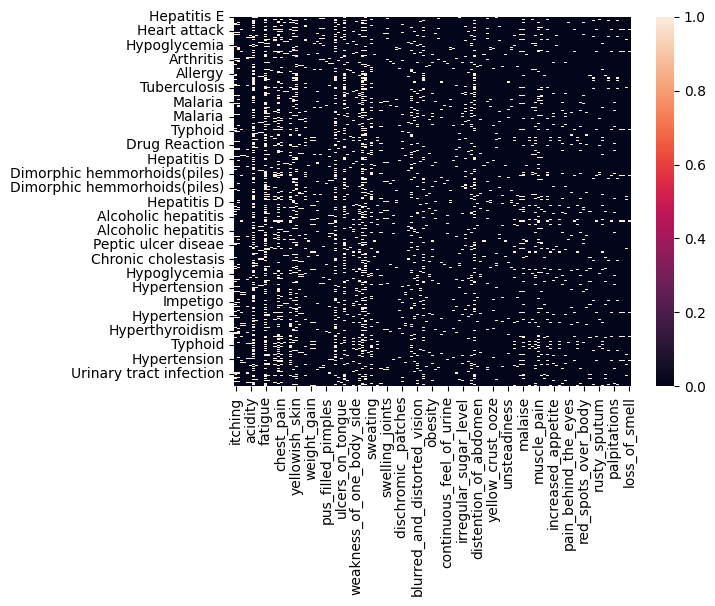

In [21]:
mapaC_train = sns.heatmap(df_train)

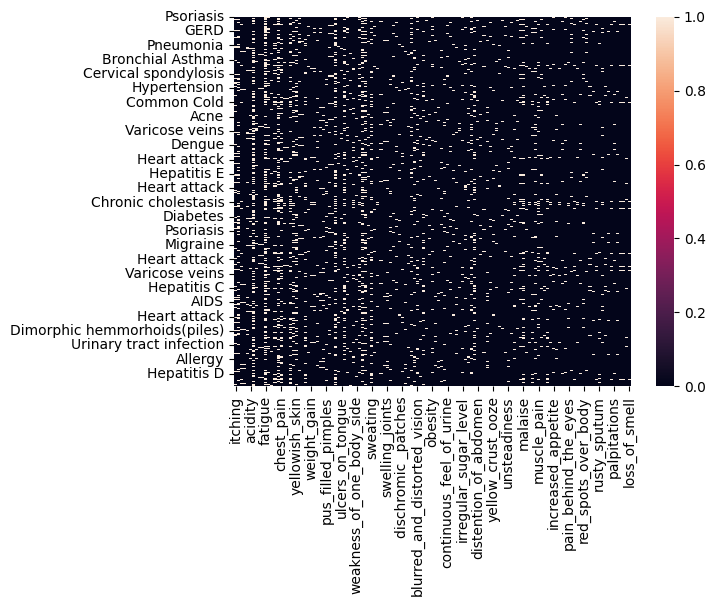

In [22]:
mapaC_test = sns.heatmap(df_test)

##Matriz de correlación de las variables

In [23]:
df_train.corr()

,itching,skin_rash,continuous_sneezing,shivering,stomach_pain,acidity,vomiting,indigestion,muscle_wasting,patches_in_throat,fatigue,weight_loss,sunken_eyes,cough,headache,chest_pain,back_pain,weakness_in_limbs,chills,joint_pain,yellowish_skin,constipation,pain_during_bowel_movements,breathlessness,cramps,weight_gain,mood_swings,neck_pain,muscle_weakness,stiff_neck,pus_filled_pimples,burning_micturition,bladder_discomfort,high_fever,nodal_skin_eruptions,ulcers_on_tongue,loss_of_appetite,restlessness,dehydration,dizziness,weakness_of_one_body_side,lethargy,nausea,abdominal_pain,pain_in_anal_region,sweating,bruising,cold_hands_and_feets,anxiety,knee_pain,swelling_joints,blackheads,foul_smell_of urine,skin_peeling,blister,dischromic _patches,watering_from_eyes,extra_marital_contacts,diarrhoea,loss_of_balance,blurred_and_distorted_vision,altered_sensorium,dark_urine,swelling_of_stomach,bloody_stool,obesity,hip_joint_pain,movement_stiffness,spinning_movements,scurring,continuous_feel_of_urine,silver_like_dusting,red_sore_around_nose,spotting_ urination,passage_of_gases,irregular_sugar_level,family_history,lack_of_concentration,excessive_hunger,yellowing_of_eyes,distention_of_abdomen,irritation_in_anus,swollen_legs,painful_walking,small_dents_in_nails,yellow_crust_ooze,internal_itching,mucoid_sputum,history_of_alcohol_consumption,swollen_blood_vessels,unsteadiness,inflammatory_nails,depression,fluid_overload,swelled_lymph_nodes,malaise,prominent_veins_on_calf,puffy_face_and_eyes,fast_heart_rate,irritability,muscle_pain,mild_fever,yellow_urine,phlegm,enlarged_thyroid,increased_appetite,visual_disturbances,brittle_nails,drying_and_tingling_lips,polyuria,pain_behind_the_eyes,toxic_look_(typhos),throat_irritation,swollen_extremeties,slurred_speech,red_spots_over_body,belly_pain,receiving_blood_transfusion,acute_liver_failure,redness_of_eyes,rusty_sputum,abnormal_menstruation,receiving_unsterile_injections,coma,sinus_pressure,palpitations,stomach_bleeding,runny_nose,congestion,blood_in_sputum,loss_of_smell
itching,1.000000,0.365726,-0.091340,-0.065299,0.229917,-0.090099,-0.066678,-0.095877,-0.070094,-0.070094,0.076689,0.104729,-0.067735,-0.152091,-0.072117,-0.169935,-0.093782,-0.066527,-0.189346,-0.174208,0.316324,-0.096173,-0.067334,-0.137657,-0.066120,-0.068529,-0.096763,-0.094384,-0.092568,-0.091340,-0.066120,0.220963,-0.064050,0.045799,0.384860,-0.061045,0.237675,-0.094983,-0.067735,-0.119984,-0.067334,0.323896,-0.078834,0.277858,-0.067334,-0.175220,-0.066120,-0.068529,-0.066527,-0.065299,-0.091648,-0.066120,-0.064050,-0.067334,-0.063628,0.384860,-0.065299,-0.070094,-0.158713,-0.117968,-0.116951,-0.067334,0.271002,-0.069706,-0.067334,-0.094684,-0.065299,-0.062778,-0.065299,-0.066120,-0.064050,-0.067334,-0.063628,0.368851,-0.068924,-0.066120,-0.095580,-0.067334,-0.137199,0.166919,-0.069706,-0.067334,-0.066120,-0.091648,-0.067334,-0.063628,-0.068924,-0.065299,-0.069706,-0.066120,-0.065299,-0.067334,-0.095580,-0.069706,0.151649,0.223011,-0.066120,-0.068529,-0.093782,-0.138571,-0.136050,0.144391,0.375787,-0.116696,-0.068529,-0.066120,-0.064885,-0.068529,-0.066527,-0.066120,-0.064469,-0.066932,-0.062349,-0.068529,-0.066527,0.235246,-0.066932,0.375787,-0.068924,-0.062349,-0.064469,-0.096763,0.375787,-0.068924,-0.062349,-0.066527,-0.068924,-0.062349,-0.062349,-0.070094,-0.062349
skin_rash,0.365726,1.000000,-0.097794,-0.069913,0.208973,-0.096465,-0.260806,-0.102651,-0.075047,-0.075047,-0.120671,-0.151995,-0.072521,-0.162837,0.046773,-0.181941,0.188058,-0.071227,-0.039046,0.175442,-0.227528,-0.102968,-0.072092,-0.147384,-0.070792,-0.073371,-0.103600,-0.101053,-0.099108,-0.097794,0.348841,0.200176,-0.068575,0.120771,0.359462,-0.065358,0.035891,-0.101694,-0.072521,-0.128461,-0.072092,0.075440,-0.115802,-0.245171,-0.072092,-0.187600,-0.070792,-0.073371,-0.071227,-0.069913,-0.098124,0.348841,-0.068575,0.355248,0.335696,0.359462,-0.069913,-0.075047,-0.169927,-0.126303,-0.125214,-0.072092,-0.171056,-0.074631,-0.072092,-0.101374,-0.069913,-0.067214,-

In [24]:
df_test.corr()

,itching,skin_rash,continuous_sneezing,shivering,stomach_pain,acidity,vomiting,indigestion,muscle_wasting,patches_in_throat,fatigue,weight_loss,sunken_eyes,cough,headache,chest_pain,back_pain,weakness_in_limbs,chills,joint_pain,yellowish_skin,constipation,pain_during_bowel_movements,breathlessness,cramps,weight_gain,mood_swings,neck_pain,muscle_weakness,stiff_neck,pus_filled_pimples,burning_micturition,bladder_discomfort,high_fever,nodal_skin_eruptions,ulcers_on_tongue,loss_of_appetite,restlessness,dehydration,dizziness,weakness_of_one_body_side,lethargy,nausea,abdominal_pain,pain_in_anal_region,sweating,bruising,cold_hands_and_feets,anxiety,knee_pain,swelling_joints,blackheads,foul_smell_of urine,skin_peeling,blister,dischromic _patches,watering_from_eyes,extra_marital_contacts,diarrhoea,loss_of_balance,blurred_and_distorted_vision,altered_sensorium,dark_urine,swelling_of_stomach,bloody_stool,obesity,hip_joint_pain,movement_stiffness,spinning_movements,scurring,continuous_feel_of_urine,silver_like_dusting,red_sore_around_nose,spotting_ urination,passage_of_gases,irregular_sugar_level,family_history,lack_of_concentration,excessive_hunger,yellowing_of_eyes,distention_of_abdomen,irritation_in_anus,swollen_legs,painful_walking,small_dents_in_nails,yellow_crust_ooze,internal_itching,mucoid_sputum,history_of_alcohol_consumption,swollen_blood_vessels,unsteadiness,inflammatory_nails,depression,fluid_overload,swelled_lymph_nodes,malaise,prominent_veins_on_calf,puffy_face_and_eyes,fast_heart_rate,irritability,muscle_pain,mild_fever,yellow_urine,phlegm,enlarged_thyroid,increased_appetite,visual_disturbances,brittle_nails,drying_and_tingling_lips,polyuria,pain_behind_the_eyes,toxic_look_(typhos),throat_irritation,swollen_extremeties,slurred_speech,red_spots_over_body,belly_pain,receiving_blood_transfusion,acute_liver_failure,redness_of_eyes,rusty_sputum,abnormal_menstruation,receiving_unsterile_injections,coma,sinus_pressure,palpitations,stomach_bleeding,runny_nose,congestion,blood_in_sputum,loss_of_smell
itching,1.000000,0.355275,-0.098432,-0.065599,0.224417,-0.100867,-0.073846,-0.088848,-0.054355,-0.054355,0.059178,0.073424,-0.060216,-0.158556,-0.079667,-0.174152,-0.093417,-0.062959,-0.184124,-0.164867,0.322982,-0.088180,-0.061143,-0.132430,-0.063850,-0.058323,-0.086831,-0.092130,-0.095950,-0.098432,-0.063850,0.241617,-0.068146,0.014771,0.373853,-0.073787,0.268968,-0.090829,-0.060216,-0.107920,-0.061143,0.341364,-0.064421,0.286145,-0.061143,-0.162625,-0.063850,-0.058323,-0.062959,-0.065599,-0.097816,-0.063850,-0.068146,-0.061143,-0.068977,0.373853,-0.065599,-0.054355,-0.144140,-0.112440,-0.114652,-0.061143,0.257570,-0.055371,-0.061143,-0.091481,-0.065599,-0.070612,-0.065599,-0.063850,-0.068146,-0.061143,-0.068977,0.413726,-0.057354,-0.063850,-0.089512,-0.061143,-0.133429,0.208262,-0.055371,-0.061143,-0.063850,-0.097816,-0.061143,-0.068977,-0.057354,-0.065599,-0.055371,-0.063850,-0.065599,-0.061143,-0.089512,-0.055371,0.141197,0.210668,-0.063850,-0.058323,-0.093417,-0.130420,-0.135905,0.158770,0.397081,-0.115201,-0.058323,-0.063850,-0.066457,-0.058323,-0.062959,-0.063850,-0.067306,-0.062057,-0.071417,-0.058323,-0.062959,0.206610,-0.062057,0.397081,-0.057354,-0.071417,-0.067306,-0.086831,0.397081,-0.057354,-0.071417,-0.062959,-0.057354,-0.071417,-0.071417,-0.054355,-0.071417
skin_rash,0.355275,1.000000,-0.114038,-0.075999,0.177214,-0.116859,-0.225651,-0.102934,-0.062973,-0.062973,-0.114054,-0.142156,-0.069764,-0.183694,0.038049,-0.201764,0.220185,-0.072941,-0.021617,0.186950,-0.213317,-0.102160,-0.070837,-0.153427,-0.073973,-0.067570,-0.100597,-0.106737,-0.111163,-0.114038,0.347589,0.193856,-0.078950,0.170120,0.322691,-0.085485,0.064704,-0.105229,-0.069764,-0.125030,-0.070837,0.054998,-0.085498,-0.229586,-0.070837,-0.188409,-0.073973,-0.067570,-0.072941,-0.075999,-0.113325,0.347589,-0.078950,0.332853,0.375497,0.322691,-0.075999,-0.062973,-0.166993,-0.130267,-0.132830,-0.070837,-0.164219,-0.064150,-0.070837,-0.105985,-0.075999,-0.081807,-

#Método Score-based structure learning: chow-liu

El algoritmo Chow-Liu busca la estructura de árbol que maximiza la verosimilitud, donde cada nodo tiene como mucho un padre. <br>
se hicieron comparaciones entre los arboles generados por un arbol de prueba o de entrenamiento.

En los siguientes bloques de codigo se ve como se hace uso de la funcion `structure_learning` la cual es la encargada de realizar el aprendizaje estructural de la red bayesiana a partir de los datos de entrenamiento y de test. este aprendizaje determina la estructura(el grafo) que representa las relaciones de dependecia entre las variables. Para este caso se hace uso del metodo _Chow-liu_ (se ve representado en `methodtype = cl`) el cual es un algoritmo utilizado para aprender arboles de dependencias, comunmente usado cuando se trabajo con distribuciones de probabilidad conjunta.
<br>
Se definio como `root_node` a la variable _Prognosis_ la cual hacer referencia a que el algoritmo centrara la estructura de la red alrededor de dicha variable.
<br>
el nombre de dag_train y de dag_test hacen referencia al resultado de aplicar la funcion. representa el grafo dirigido aciclico `DAG` el cual contiene las relaciones entre las variables en forma de arcos dirigidos.

Por ultimo se realizo uso de la funcion `parameter_learning` la cual es la encargada de realizar el aprendizaje de parametros. aqui se ajustan las distribuciones de probabilidad para cada nodo (variable) en el grafo basandose en sus datos de entrenamiento.
<br>
dandonos como resultado `model_train` y `model_test`. variables las cuales son el resultado de los modelos ya completamente entrenados. que ahora no solo tienen la estructura, sino tambien los parametros (distribuciones de probabilidad) ajustados para cada nodo, Este modelo se puede utilizar para hacer las inferenecias probabilisticas.

###Aplicando al training dataset

In [25]:
df_train.reset_index(inplace=True)
df_train = df_train.rename(columns = {'index':'Prognosis'})

In [26]:
df_test.reset_index(inplace=True)
df_test = df_test.rename(columns = {'index':'Prognosis'})

In [27]:
dag_train = bn.structure_learning.fit(df_train,  methodtype = 'cl',  root_node = 'Prognosis')

[bnlearn] >Computing best DAG using [chow-liu]


Building tree:   0%|          | 0/8646.0 [00:00<?, ?it/s]

[bnlearn] >Compute structure scores for model comparison (higher is better).


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


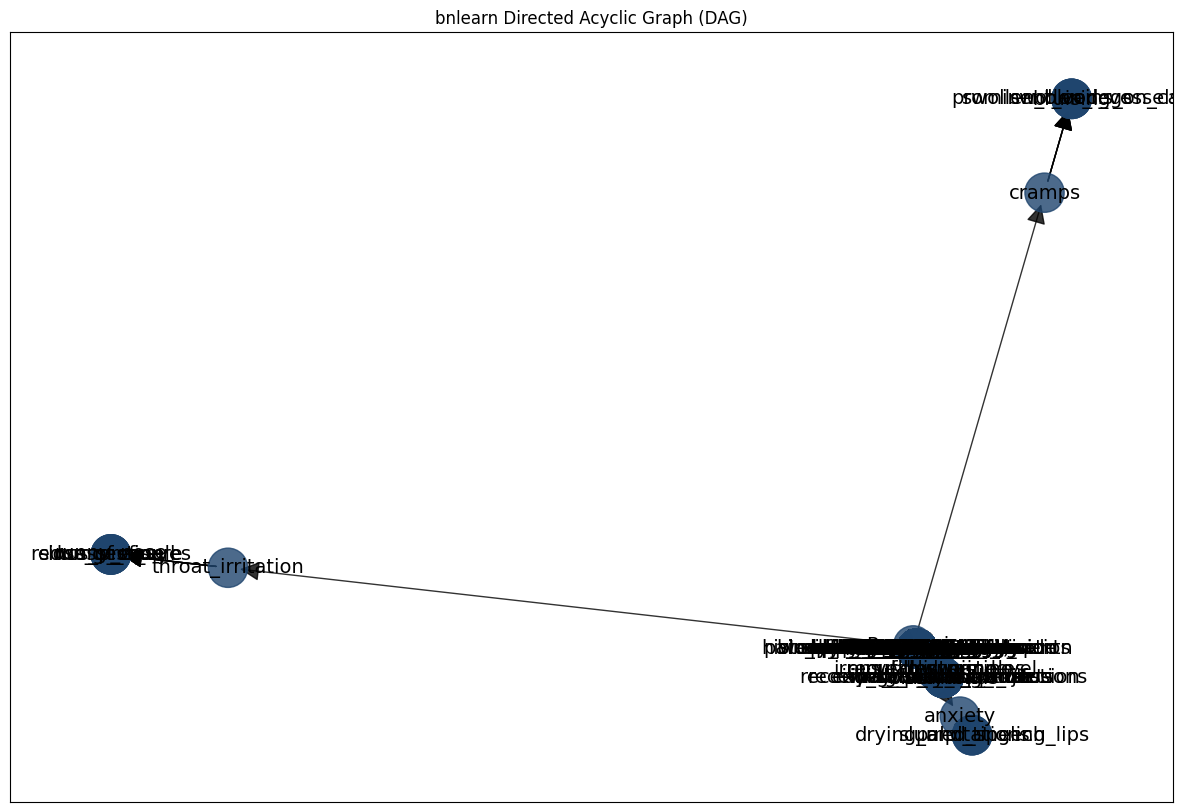

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'Prognosis': array([ 0.0257776 , -0.02925421]),
  'vomiting': array([ 0.03033026, -0.03553498]),
  'fatigue': array([ 0.03033026, -0.03553498]),
  'high_fever': array([ 0.03033026, -0.03553498]),
  'loss_of_appetite': array([ 0.03033026, -0.03553498]),
  'nausea': array([ 0.03033026, -0.03553498]),
  'headache': array([ 0.03033026, -0.03553498]),
  'abdominal_pain': array([ 0.03033026, -0.03553498]),
  'yellowish_skin': array([ 0.03033026, -0.03553498]),
  'yellowing_of_eyes': array([ 0.03033026, -0.03553498]),
  'skin_rash': array([ 0.03033026, -0.03553498]),
  'chills': array([ 0.03033026, -0.03553498]),
  'itching': array([ 0.03033026, -0.03553498]),
  'sweating': array([ 0.03033026, -0.03553498]),
  'joint_pain': array([ 0.03033026, -0.03553498]),
  'malaise': array([ 0.03033026, -0.03553498]),
  'chest_pain': array([ 0.03033026, -0.03553498]),
  'dark_urine': array([ 0.03033026, -0.03

In [28]:
bn.plot(dag_train)

In [29]:
model_train = bn.parameter_learning.fit(dag_train, df_train)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Prognosis:
+----------------------------------------------------+-----------+
| Prognosis((vertigo) Paroymsal  Positional Vertigo) | 0.0237152 |
+----------------------------------------------------+-----------+
| Prognosis(AIDS)                                    | 0.0264154 |
+----------------------------------------------------+-----------+
| Prognosis(Acne)                                    | 0.0241652 |
+----------------------------------------------------+-----------+
| Prognosis(Alcoholic hepatitis)                     | 0.0261904 |
+----------------------------------------------------+-----------+
| Prognosis(Allergy)                                 | 0.0237152 |
+----------------------------------------------------+-----------+
| Prognosis(Arthritis)                  

###Aplicando al testing dataset

In [30]:
dag_test = bn.structure_learning.fit(df_test,  methodtype = 'cl', root_node = 'Prognosis')

[bnlearn] >Computing best DAG using [chow-liu]


Building tree:   0%|          | 0/8646.0 [00:00<?, ?it/s]

[bnlearn] >Compute structure scores for model comparison (higher is better).


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


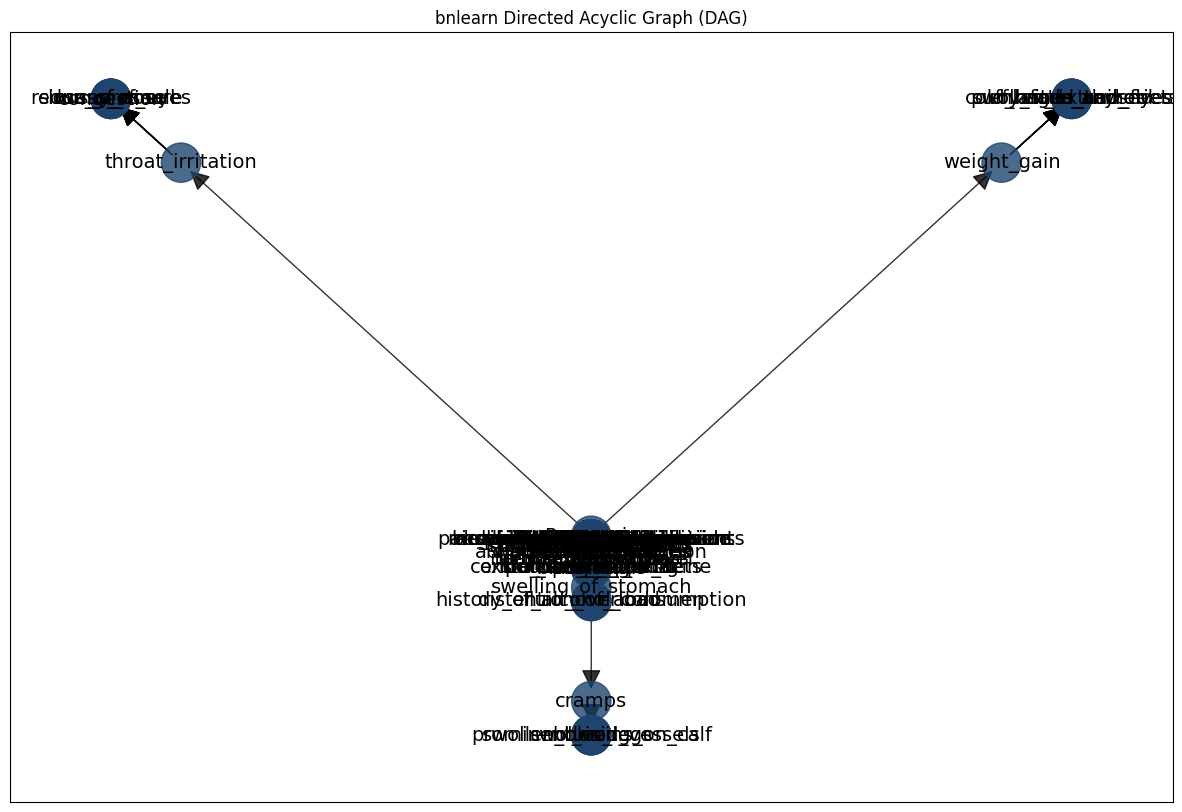

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'Prognosis': array([ 7.50427364e-17, -4.91873255e-02]),
  'fatigue': array([ 2.28697735e-16, -5.81342289e-02]),
  'vomiting': array([-1.11361755e-16, -5.81342289e-02]),
  'high_fever': array([ 2.75402259e-16, -5.81342289e-02]),
  'headache': array([-1.34287927e-17, -5.81342289e-02]),
  'nausea': array([-1.84696190e-16, -5.81342289e-02]),
  'loss_of_appetite': array([-1.29494075e-16, -5.81342289e-02]),
  'abdominal_pain': array([-2.03256676e-16, -5.81342289e-02]),
  'yellowish_skin': array([-5.83865793e-16, -5.81342289e-02]),
  'chills': array([-9.57331577e-17, -5.81342289e-02]),
  'skin_rash': array([ 1.49343317e-16, -5.81342289e-02]),
  'chest_pain': array([ 6.49678543e-17, -5.81342289e-02]),
  'yellowing_of_eyes': array([ 1.84493687e-16, -5.81342289e-02]),
  'malaise': array([ 3.59249255e-16, -5.81342289e-02]),
  'joint_pain': array([ 6.38790391e-17, -5.81342289e-02]),
  'sweating': arra

In [31]:
bn.plot(dag_test)

In [32]:
model_test = bn.parameter_learning.fit(dag_test, df_test)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Prognosis:
+----------------------------------------------------+-----------+
| Prognosis((vertigo) Paroymsal  Positional Vertigo) | 0.0256019 |
+----------------------------------------------------+-----------+
| Prognosis(AIDS)                                    | 0.0207553 |
+----------------------------------------------------+-----------+
| Prognosis(Acne)                                    | 0.0247941 |
+----------------------------------------------------+-----------+
| Prognosis(Alcoholic hepatitis)                     | 0.0211592 |
+----------------------------------------------------+-----------+
| Prognosis(Allergy)                                 | 0.0256019 |
+----------------------------------------------------+-----------+
| Prognosis(Arthritis)                  

##Comparación entre los modelos de training y testing

para comparar la efectividad de los modelos y determinar cual es el optimo. se hizo uso de la funcion `compare_networks`. esta funcion compara dos redes bayesianas para evaluar la similitud entre ellas. En el contexto de redes bayesianas, es comun comparar el grafo aprendido a partir de los datos de entrenamiento con otro grafo, que podria ser un grafo obtenido de un conjunto de prueba o un modelo esperado. recordemos que:<br>

* `dag_train:` Es un grafo dirigido acíclico (DAG) obtenido del proceso de aprendizaje estructural utilizando el conjunto de datos de entrenamiento. Este DAG representa las relaciones de dependencia aprendidas entre las variables en los datos de entrenamiento.

* `dag_test:` Es otro DAG que se quiere comparar con el DAG obtenido del entrenamiento. Este DAG podría haber sido aprendido a partir de otro conjunto de datos o ser una red bayesiana teórica o esperada.
<br>

por ultimo teniendo en cuenta los `Compute structure scores for model comparison` (mayor valor es mejor) tenemos que model_test es el modelo a utilizar.

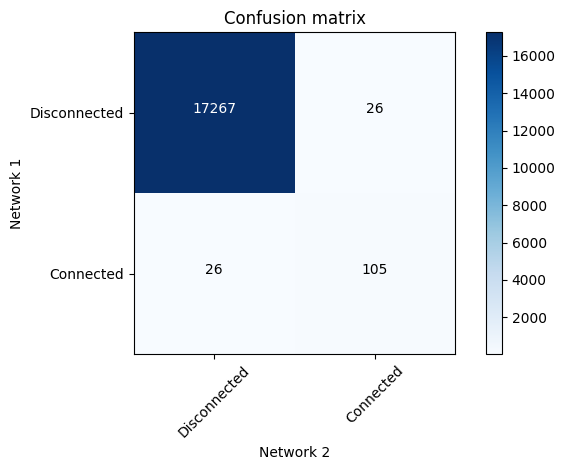

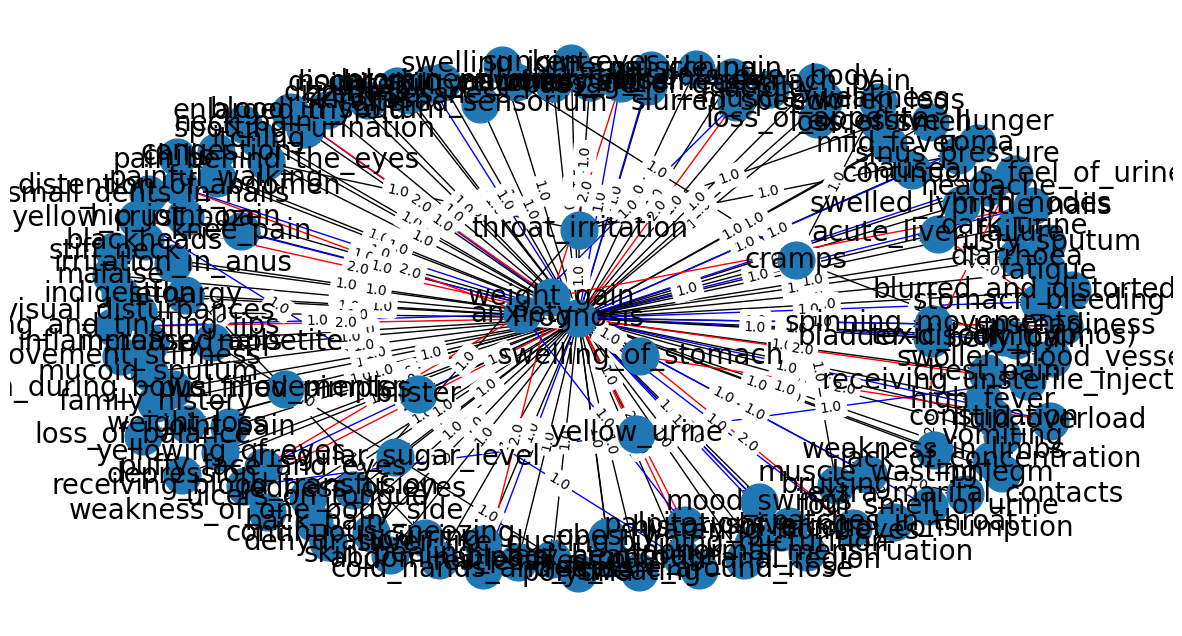

(array([[17267,    26],
        [   26,   105]]),
 target            Prognosis  vomiting  fatigue  high_fever  loss_of_appetite  \
 source                                                                         
 Prognosis                 0         1        1           1                 1   
 vomiting                  0         0        0           0                 0   
 fatigue                   0         0        0           0                 0   
 high_fever                0         0        0           0                 0   
 loss_of_appetite          0         0        0           0                 0   
 ...                     ...       ...      ...         ...               ...   
 redness_of_eyes           0         0        0           0                 0   
 sinus_pressure            0         0        0           0                 0   
 runny_nose                0         0        0           0                 0   
 congestion                0         0        0           0

In [33]:
bn.compare_networks(dag_train, dag_test)

#Query

El código realiza los siguientes pasos:

1. Preparación para la Inferencia: Se
configura la inferencia en la red bayesiana utilizando el modelo model_test.

2. Especificación de Variables de Interés: Se indica que estamos interesados en la probabilidad de la variable Prognosis.

3. Proporcionar Evidencia: Se proporcionan los valores de evidencia (síntomas presentes) para calcular la probabilidad de Prognosis.

4. Realizar Inferencia: La función bn.inference.fit calcula la distribución de probabilidad posterior para Prognosis dada la evidencia proporcionada.


El resultado de la inferencia (`query`) es una distribución de probabilidad que indica la probabilidad de que la variable Prognosis tome ciertos valores, dado que los síntomas itching, skin_rash, y dischromic_patches están presentes.

In [34]:
query = bn.inference.fit(model_test, variables=['Prognosis'], evidence = {'itching':1, 'skin_rash':1, 'dischromic _patches':1})

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+-----------------------------------------+------------+
|    | Prognosis                               |          p |
+====+=========================================+============+
|  0 | (vertigo) Paroymsal  Positional Vertigo | 0.00779573 |
+----+-----------------------------------------+------------+
|  1 | AIDS                                    | 0.0104586  |
+----+-----------------------------------------+------------+
|  2 | Acne                                    | 0.0328694  |
+----+-----------------------------------------+------------+
|  3 | Alcoholic hepatitis                     | 0.0101757  |
+----+-----------------------------------------+------------+
|  4 | Allergy                                 | 0.00779573 |
+----+-----------------------------------------+------------+
|  5 | Arthritis                               | 0.0068905

Mostrando asi que el usuario tenga un 38% de tener `Fungal infection`, 10% de `Drug Reaction`, asi sucesivamente.

In [35]:
query.df.sort_values('p', ascending=False)

,Prognosis,p
15,Fungal infection,0.247844
14,Drug Reaction,0.137386
8,Chicken pox,0.122903
28,Jaundice,0.033539
35,Psoriasis,0.033089
9,Chronic cholestasis,0.033089
19,Hepatitis B,0.032942
2,Acne,0.032869
11,Dengue,0.032587
27,Impetigo,0.032450


In [36]:

dfquery = query.df.sort_values('p', ascending=False)

In [37]:
dfquery['p'].sum()

0.9999999999999999

# Pruebas

En el modulo de pruebas, hicimos uso de la funcion random. para generar 5 consultas con 3 sintomas aleatorias cada una.

In [70]:
import random

# Lista de síntomas disponibles
sintomas_disponibles = df_test.columns.tolist()
sintomas_disponibles.remove('Prognosis')  # Eliminamos 'Prognosis' ya que es la variable objetivo

# Generamos 5 consultas con 3 síntomas aleatorios cada una

consultas = []
evidencias = []
queries = []

# Generar síntomas y evidencias para cada consulta
for _ in range(5):
    sintomas_consulta = random.sample(sintomas_disponibles, 3)
    consultas.append(sintomas_consulta)
    evidencia = {sintoma: 1 for sintoma in sintomas_consulta}
    evidencias.append(evidencia)

# Realizar la inferencia para cada conjunto de evidencias
for evidencia in evidencias:
    query = bn.inference.fit(model_test, variables=['Prognosis'], evidence=evidencia)
    queries.append(query)



[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+-----------------------------------------+------------+
|    | Prognosis                               |          p |
+====+=========================================+============+
|  0 | (vertigo) Paroymsal  Positional Vertigo | 0.110316   |
+----+-----------------------------------------+------------+
|  1 | AIDS                                    | 0.0159768  |
+----+-----------------------------------------+------------+
|  2 | Acne                                    | 0.0124417  |
+----+-----------------------------------------+------------+
|  3 | Alcoholic hepatitis                     | 0.0155438  |
+----+-----------------------------------------+------------+
|  4 | Allergy                                 | 0.0119027  |
+----+-----------------------------------------+------------+
|  5 | Arthritis                               | 0.0105184

Mostrando los valores optenidos de las 5 consultas:

In [74]:
sujetos = ['A', 'B', 'C', 'D', 'E']

for i, (evidencia, query) in enumerate(zip(evidencias, queries)):
    print(f'''
Teniendo en cuenta los siguientes síntomas del sujeto {sujetos[i]}:
====================================================================
{list(evidencia.keys())[0]}
{list(evidencia.keys())[1]}
{list(evidencia.keys())[2]}
====================================================================
Se agruparon las primeras 5 enfermedades con mayor probabilidad:
{query.df.sort_values('p', ascending=False).head(5)}
====================================================================''')



Teniendo en cuenta los siguientes síntomas del sujeto A:
mucoid_sputum
nausea
unsteadiness
Se agruparon las primeras 5 enfermedades con mayor probabilidad:
                                  Prognosis         p
0   (vertigo) Paroymsal  Positional Vertigo  0.110316
22                              Hepatitis E  0.050997
29                                  Malaria  0.050880
20                              Hepatitis C  0.050763
9                       Chronic cholestasis  0.050531

Teniendo en cuenta los siguientes síntomas del sujeto B:
fast_heart_rate
swollen_extremeties
bruising
Se agruparon las primeras 5 enfermedades con mayor probabilidad:
          Prognosis         p
34        Pneumonia  0.082740
24  Hyperthyroidism  0.079609
26   Hypothyroidism  0.043900
39   Varicose veins  0.043097
1              AIDS  0.022970

Teniendo en cuenta los siguientes síntomas del sujeto C:
swelled_lymph_nodes
muscle_pain
increased_appetite
Se agruparon las primeras 5 enfermedades con mayor probabilida

# Verificar Pruebas

Para probar que las pruebas son efectivas. buscamos los sintomas de Tubercolosis en el dataset principal. y procedemos a poner un numero considerable de ellos, lo que se busca es que la probabilidad de esta prediccion sea muy alta.

In [40]:
tuberculosis_rows = df[df['Disease'] == 'Tuberculosis']
tuberculosis_rows

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
250,Tuberculosis,chills,vomiting,fatigue,weight_loss,cough,high_fever,breathlessness,sweating,loss_of_appetite,mild_fever,yellowing_of_eyes,swelled_lymph_nodes,malaise,phlegm,chest_pain,blood_in_sputum,NaN
251,Tuberculosis,chills,vomiting,fatigue,weight_loss,cough,high_fever,breathlessness,sweating,loss_of_appetite,mild_fever,yellowing_of_eyes,swelled_lymph_nodes,malaise,phlegm,chest_pain,blood_in_sputum,NaN
252,Tuberculosis,vomiting,fatigue,weight_loss,cough,high_fever,breathlessness,sweating,loss_of_appetite,mild_fever,yellowing_of_eyes,swelled_lymph_nodes,malaise,phlegm,chest_pain,blood_in_sputum,NaN,NaN
253,Tuberculosis,chills,fatigue,weight_loss,cough,high_fever,breathlessness,sweating,loss_of_appetite,mild_fever,yellowing_of_eyes,swelled_lymph_nodes,malaise,phlegm,chest_pain,blood_in_sputum,NaN,NaN
254,Tuberculosis,chills,vomiting,weight_loss,cough,high_fever,breathlessness,sweating,loss_of_appetite,mild_fever,yellowing_of_eyes,swelled_lymph_nodes,malaise,phlegm,chest_pain,blood_in_sputum,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4740,Tuberculosis,chills,vomiting,fatigue,weight_loss,cough,high_fever,breathlessness,sweating,loss_of_appetite,mild_fever,yellowing_of_eyes,swelled_lymph_nodes,malaise,phlegm,chest_pain,blood_in_sputum,NaN
4781,Tuberculosis,chills,vomiting,fatigue,weight_loss,cough,high_fever,breathlessness,sweating,loss_of_appetite,mild_fever,yellowing_of_eyes,swelled_lymph_nodes,malaise,phlegm,chest_pain,blood_in_sputum,NaN
4822,Tuberculosis,chills,vomiting,fatigue,weight_loss,cough,high_fever,breathlessness,sweating,loss_of_appetite,mild_fever,yellowing_of_eyes,swelled_lymph_nodes,malaise,phlegm,chest_pain,blood_in_sputum,NaN
4863,Tuberculosis,chills,vomiting,fatigue,weight_loss,cough,high_fever,breathlessness,sweating,loss_of_appetite,mild_fever,yellowing_of_eyes,swelled_lymph_nodes,malaise,phlegm,chest_pain,blood_in_sputum,NaN


Filtramos los valores unicos de la enfermedad por columna y despues los adjuntamos a nuestra lista de sintomas.

In [41]:
unique_values = {col: tuberculosis_rows[col].unique() for col in tuberculosis_rows.columns}
all_values = {col: tuberculosis_rows[col].tolist() for col in tuberculosis_rows.columns}

# Mostrar los valores
for col, values in unique_values.items():
    print(f"Valores en la columna '{col}': {values}")

Valores en la columna 'Disease': ['Tuberculosis']
Valores en la columna 'Symptom_1': [' chills' ' vomiting']
Valores en la columna 'Symptom_2': [' vomiting' ' fatigue']
Valores en la columna 'Symptom_3': [' fatigue' ' weight_loss']
Valores en la columna 'Symptom_4': [' weight_loss' ' cough']
Valores en la columna 'Symptom_5': [' cough' ' high_fever']
Valores en la columna 'Symptom_6': [' high_fever' ' breathlessness']
Valores en la columna 'Symptom_7': [' breathlessness' ' sweating']
Valores en la columna 'Symptom_8': [' sweating' ' loss_of_appetite']
Valores en la columna 'Symptom_9': [' loss_of_appetite' ' mild_fever']
Valores en la columna 'Symptom_10': [' mild_fever' ' yellowing_of_eyes']
Valores en la columna 'Symptom_11': [' yellowing_of_eyes' ' swelled_lymph_nodes']
Valores en la columna 'Symptom_12': [' swelled_lymph_nodes' ' malaise']
Valores en la columna 'Symptom_13': [' malaise' ' phlegm']
Valores en la columna 'Symptom_14': [' phlegm' ' chest_pain']
Valores en la columna '

In [42]:
sintomas_para_tuber = {'chills':1,'vomiting':1,'fatigue':1,'cough':1, 'high_fever':1, 'breathlessness':1, 'sweating':1, 'yellowing_of_eyes':1}

In [43]:
query = bn.inference.fit(model_test, variables=['Prognosis'], evidence = sintomas_para_tuber)
dfquery = query.df.sort_values('p', ascending=False)
dfquery

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+-----------------------------------------+-------------+
|    | Prognosis                               |           p |
+====+=========================================+=============+
|  0 | (vertigo) Paroymsal  Positional Vertigo | 7.27868e-05 |
+----+-----------------------------------------+-------------+
|  1 | AIDS                                    | 0.00024213  |
+----+-----------------------------------------+-------------+
|  2 | Acne                                    | 2.17006e-05 |
+----+-----------------------------------------+-------------+
|  3 | Alcoholic hepatitis                     | 0.000216971 |
+----+-----------------------------------------+-------------+
|  4 | Allergy                                 | 7.27868e-05 |
+----+-----------------------------------------+-------------+
|  5 | Arthritis                             

,Prognosis,p
36,Tuberculosis,0.857767
34,Pneumonia,0.096093
22,Hepatitis E,0.007258
29,Malaria,0.007017
37,Typhoid,0.006138
6,Bronchial Asthma,0.005385
11,Dengue,0.005050
10,Common Cold,0.004319
28,Jaundice,0.002357
21,Hepatitis D,0.001503


In [44]:
dfquery[dfquery['Prognosis']=='Tuberculosis']

,Prognosis,p
36,Tuberculosis,0.857767


Como se esperaba la probabilidad de tener tuberculosis dados sintomas relevantes para la enfermedad es de 90%.

# Conclusion

El desarrollo e implementación de modelos de redes bayesianas mediante Python ha demostrado ser una herramienta valiosa para tomar decisiones en el ámbito médico, como se vio en el diagnóstico y enfermedades. A lo largo de la realización de este proyecto, se ha evidenciado como estas redes permiten modelar la incertidumbre y la complejidad de los diagnósticos médicos, proporcionando una forma eficiente de inferir la probabilidad de contraer distintas enfermedades basada en la observación de los síntomas.


El uso de `bnLearn` facilito la construcción de modelos predictivos robustos y accesibles, permitiendo que profesionales que no cuenten con un alto grado de conocimiento en estadística puedan implementar soluciones efectivas.


En conclusión, el proyecto concluyo en no solo el desarrollo técnico de una herramienta útil para realizar diagnósticos médicos, sino también ha destacado la implementación de las redes bayesiana como un enfoque a considerar, además de accesibles para la resolución de problemas complejos en entornos donde la información es incompleta o incierta.
